In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 88B8-561F

 Directory of C:\Users\dsilva2\EMAT22110_FA22

11/17/2022  11:05 AM    <DIR>          .
11/17/2022  11:05 AM    <DIR>          ..
11/17/2022  11:05 AM    <DIR>          .ipynb_checkpoints
10/19/2022  11:17 AM            41,566 10-18_in-class.ipynb
10/18/2022  11:18 AM           106,102 10-18_prep.ipynb
10/20/2022  11:17 AM             9,821 10-20_in-class-Spotify.ipynb
10/20/2022  11:17 AM            76,091 10-20_prep_BLS-API.ipynb
10/27/2022  11:15 AM            38,005 10-27_in-class.ipynb
10/27/2022  11:15 AM            84,335 10-27_prep-SQL.ipynb
10/06/2022  11:23 AM            20,763 10-4_in-class.ipynb
10/18/2022  11:18 AM            31,856 10-6_in-class.ipynb
10/20/2022  11:17 AM           164,720 10-8_Spotify-API-prep.ipynb
11/01/2022  11:10 AM            51,341 11-1_in-class.ipynb
11/01/2022  11:10 AM           363,683 11-1_prep.ipynb
11/10/2022  12:36 PM            13,941 11-10_in-class.ipynb
11/15/2022  12:20 P

In [4]:
af = pd.read_csv('audio_features.csv', sep = ',')

In [7]:
af.tail()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,album
31,11,0.453,0.383,1,-9.266,1,0.0408,0.350000,0.002420,0.0917,0.282,137.255,audio_features,0nrKz8Ez1mQ1wiv1oqc7Ld,spotify:track:0nrKz8Ez1mQ1wiv1oqc7Ld,https://api.spotify.com/v1/tracks/0nrKz8Ez1mQ1...,https://api.spotify.com/v1/audio-analysis/0nrK...,284000,4,loneliest
32,12,0.707,0.562,2,-6.202,1,0.0567,0.105000,0.000000,0.0999,0.525,122.993,audio_features,6c6vULMrRuN4NECs2iB1xe,spotify:track:6c6vULMrRuN4NECs2iB1xe,https://api.spotify.com/v1/tracks/6c6vULMrRuN4...,https://api.spotify.com/v1/audio-analysis/6c6v...,274507,4,loneliest
33,13,0.690,0.710,8,-5.819,1,0.0338,0.000484,0.020800,0.1040,0.515,115.088,audio_features,1dTkx1nSrcMSUoGffsn07A,spotify:track:1dTkx1nSrcMSUoGffsn07A,https://api.spotify.com/v1/tracks/1dTkx1nSrcMS...,https://api.spotify.com/v1/audio-analysis/1dTk...,177467,4,loneliest
34,14,0.601,0.453,8,-9.999,1,0.0801,0.812000,0.277000,0.1060,0.623,75.005,audio_features,6AGklQLROYjvD8qxAPrk3b,spotify:track:6AGklQLROYjvD8qxAPrk3b,https://api.spotify.com/v1/tracks/6AGklQLROYjv...,https://api.spotify.com/v1/audio-analysis/6AGk...,282426,4,loneliest
35,15,0.696,0.586,0,-8.695,1,0.0459,0.521000,0.000228,0.0821,0.561,103.983,audio_features,1gp2oWZSi4ucFCvJU763Uq,spotify:track:1gp2oWZSi4ucFCvJU763Uq,https://api.spotify.com/v1/tracks/1gp2oWZSi4uc...,https://api.spotify.com/v1/audio-analysis/1gp2...,242400,4,loneliest


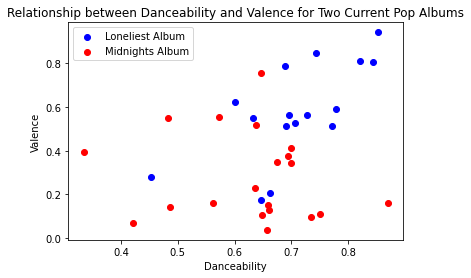

In [19]:
fig1, ax1 = plt.subplots()
mid_df = af[af['album'] == 'midnights']
lon_df = af[af['album'] == 'loneliest']
ax1.scatter(lon_df['danceability'], lon_df['valence'], label = 'Loneliest Album', color = 'blue')
ax1.scatter(mid_df['danceability'], mid_df['valence'], label = 'Midnights Album', color = 'red')
ax1.set_xlabel('Danceability')
ax1.set_ylabel('Valence')
ax1.set_title('Relationship between Danceability and Valence for Two Current Pop Albums')
ax1.legend()
plt.show()

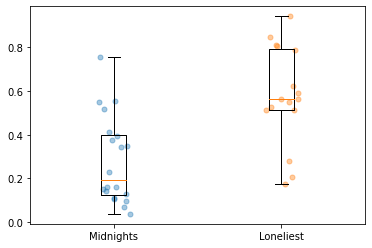

In [43]:
fig2, ax2 = plt.subplots()
mid_val = af[af['album'] == 'midnights']['valence']
lon_val = af[af['album'] == 'loneliest']['valence']
mid_x = [1] * len(mid_val)
lon_x = [2] * len(lon_val)
mid_x_jitter = np.random.uniform(-0.10, .10, len(mid_x))
lon_x_jitter = np.random.uniform(-0.10, .10, len(lon_x))
ax2.scatter(mid_x + mid_x_jitter, mid_val, alpha = 0.4, s = 25)
ax2.scatter(lon_x + lon_x_jitter, lon_val, alpha = 0.4, s = 25)
ax2.set_xlim(0.5, 2.5)
# fig2.set_figheight(20)
ax2.boxplot([mid_val, lon_val])
ax2.set_xticks([1,2], ['Midnights', 'Loneliest'])
plt.show()